<a href="https://colab.research.google.com/github/sathvik-spartan/sathvik-spartan/blob/main/Sentiment_Analysis_using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [ ]:
Analysis = pd.read_csv("/content/all-data.csv",encoding='ISO-8859-1')

In [ ]:
Analysis

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [ ]:
Analysis = Analysis.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'statement'})

In [ ]:
Analysis.describe()

,sentiment,statement
count,4845,4845
unique,3,4837
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2878,2


In [ ]:
Analysis.drop_duplicates(subset=['statement'],keep='first',inplace=True)
Analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4837 non-null   object
 1   statement  4837 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


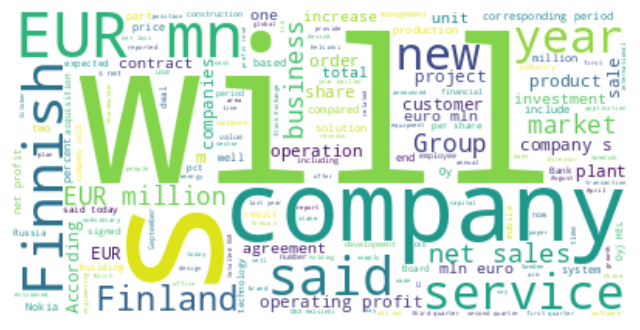

In [ ]:
text = " ".join([x for x in Analysis.statement])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

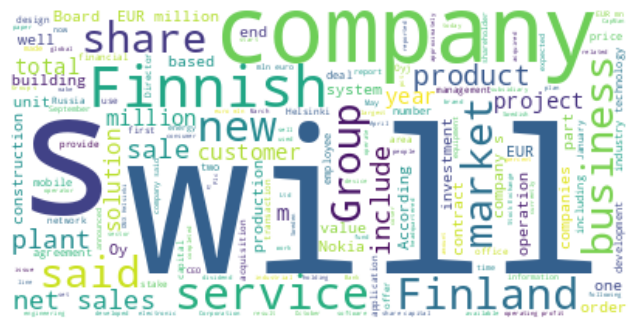

In [ ]:
 ## for netural

text = " ".join([x for x in Analysis.statement[Analysis.sentiment=='neutral']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

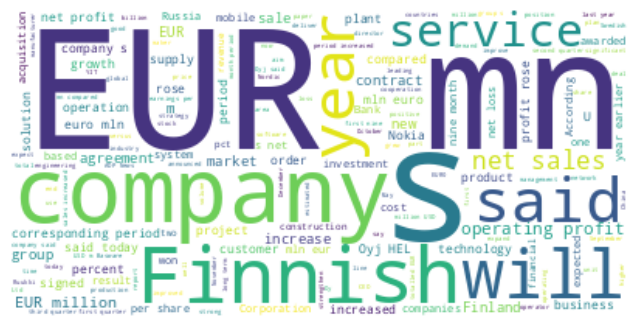

In [ ]:
## for positive

text = " ".join([x for x in Analysis.statement[Analysis.sentiment=='positive']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

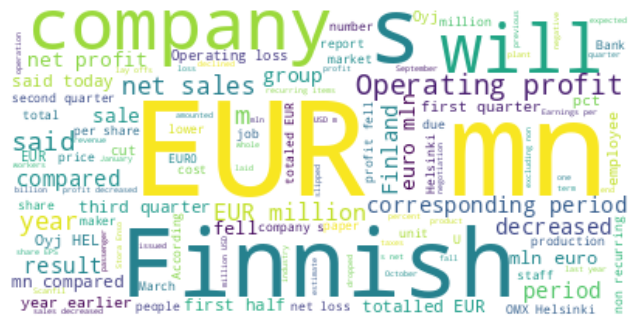

In [ ]:
## for negative

text = " ".join([x for x in Analysis.statement[Analysis.sentiment=='negative']])

wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
Analysis['sentiment'].value_counts()

neutral     2871
positive    1362
negative     604
Name: sentiment, dtype: int64

In [ ]:
train,eva = train_test_split(Analysis,test_size = 0.2)

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 KB 20

In [ ]:
from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
# 0,1,2 : positive,negative

def making_label(st):
    if(st=='positive'):
        return 0
    elif(st=='neutral'):
        return 2
    else:
        return 1

train['label'] = train['sentiment'].apply(making_label)
eva['label'] = eva['sentiment'].apply(making_label)
print(train.shape)

(3869, 3)


In [ ]:
train_df = pd.DataFrame({
    'text': train['statement'][:1500].replace(r'\n', ' ', regex=True),
    'label': train['label'][:1500]
})

eval_df = pd.DataFrame({
    'text': eva['statement'][-400:].replace(r'\n', ' ', regex=True),
    'label': eva['label'][-400:]
})

In [ ]:
model.train_model(train_df)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1500 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/188 [00:00<?, ?it/s]

(188, 0.6001564257362104)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.66299393682253, 'eval_loss': 0.47298668809235095}

In [ ]:
model_outputs

array([[-1.07997692, -2.37480044,  3.03309155],
       [ 0.96969551, -2.31165791,  1.11319458],
       [-1.01624107, -2.49090481,  3.02711391],
       ...,
       [-0.84170675, -1.983881  ,  2.65481949],
       [ 1.40392697, -2.35571456,  0.41546798],
       [-1.05094385,  1.11480868, -0.02259949]])

In [ ]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [ ]:
true = eval_df['label'].tolist()
predicted = lst

In [ ]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[ 85,   0,  33],
       [  3,  31,  10],
       [ 20,   6, 212]])

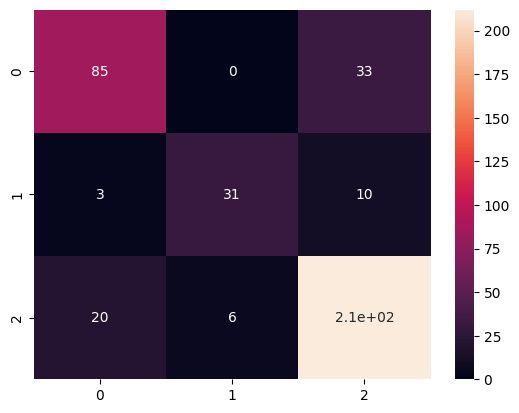

In [ ]:
df_cm = pd.DataFrame(mat, range(3), range(3))

sns.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
report=sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative'])
print(report.replace('\n', '\n\n'))

              precision    recall  f1-score   support



    positive       0.79      0.72      0.75       118

     neutral       0.84      0.70      0.77        44

    negative       0.83      0.89      0.86       238



    accuracy                           0.82       400

   macro avg       0.82      0.77      0.79       400

weighted avg       0.82      0.82      0.82       400




In [ ]:
sklearn.metrics.accuracy_score(true,predicted)

0.82

In [ ]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'positive',1:'negative',2:'neutral'}
    print(sentiment_dict[pos])
    return

In [ ]:
#netural

get_result("According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


In [ ]:
get_result("You’re braver than you believe, and stronger than you seem, and smarter than you think")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


In [ ]:
get_result("In every day, there are 1,440 minutes. That means we have 1,440 daily opportunities to make a positive impact.")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

positive


In [ ]:
get_result("Happiness is an attitude. We either make ourselves miserable, or happy and strong. The amount of work is the same.")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

neutral
